[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Venura-Shiromal/Ai-session-term1/blob/main/AI_MachineLearning/Stress%20Predicition/StressPrediction_CatBoost.ipynb)

In [1]:
# just in case
# !pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00


# Importing Modules

In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Loading Data

In [3]:
df = pd.read_csv("lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Preprocessing

In [4]:
df[['Systolic Pressure', 'Diastolic Pressure']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic Pressure'] = pd.to_numeric(df['Systolic Pressure'])
df['Diastolic Pressure'] = pd.to_numeric(df['Diastolic Pressure'])

df = df.drop('Blood Pressure', axis=1)

In [5]:
cat_cols = ["Occupation", "Gender"]

## Mapping

In [6]:
print(df["BMI Category"].unique())
print(df["Sleep Disorder"].unique())

['Overweight' 'Normal' 'Obese' 'Normal Weight']
[nan 'Sleep Apnea' 'Insomnia']


In [7]:
BMI_Map = {
    "Normal Weight": 1,
    "Normal": 1,
    "Overweight": 2,
    "Obese": 3
}

df["BMI Category"] = df["BMI Category"].map(BMI_Map)

Sleep_Disorder_Map = {
    "Sleep Apnea": 1,
    "Insomnia": 2
}

df["Sleep Disorder"] = df["Sleep Disorder"].map(Sleep_Disorder_Map)

### Filling Missing Values

In [8]:
df.fillna({"Sleep Disorder": 0}, inplace=True)

In [9]:
df.isna().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Heart Rate,0


In [10]:
df.head(20)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,2,77,4200,0.0,126,83
1,2,Male,28,Doctor,6.2,6,60,8,1,75,10000,0.0,125,80
2,3,Male,28,Doctor,6.2,6,60,8,1,75,10000,0.0,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,3,85,3000,1.0,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,3,85,3000,1.0,140,90
5,6,Male,28,Software Engineer,5.9,4,30,8,3,85,3000,2.0,140,90
6,7,Male,29,Teacher,6.3,6,40,7,3,82,3500,2.0,140,90
7,8,Male,29,Doctor,7.8,7,75,6,1,70,8000,0.0,120,80
8,9,Male,29,Doctor,7.8,7,75,6,1,70,8000,0.0,120,80
9,10,Male,29,Doctor,7.8,7,75,6,1,70,8000,0.0,120,80


### X, Y Configuration

In [11]:
x = df.drop(["Stress Level"], axis=1)
y = df["Stress Level"]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

# Model Configuration

In [13]:
model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.04,
    l2_leaf_reg=5,
    border_count=50,
    random_state=42,
    verbose=50
)

# Training

In [14]:
model.fit(x_train, y_train, cat_features=cat_cols, eval_set=(x_test, y_test))

0:	learn: 1.7197959	test: 1.7216815	best: 1.7216815 (0)	total: 55.4ms	remaining: 27.7s
50:	learn: 0.4705001	test: 0.4718703	best: 0.4718703 (50)	total: 406ms	remaining: 3.57s
100:	learn: 0.2783842	test: 0.2884747	best: 0.2884747 (100)	total: 740ms	remaining: 2.92s
150:	learn: 0.2021024	test: 0.2238052	best: 0.2238052 (150)	total: 1.27s	remaining: 2.94s
200:	learn: 0.1611819	test: 0.1911793	best: 0.1911793 (200)	total: 1.68s	remaining: 2.5s
250:	learn: 0.1348685	test: 0.1709599	best: 0.1709599 (250)	total: 2.03s	remaining: 2.01s
300:	learn: 0.1152639	test: 0.1544504	best: 0.1544504 (300)	total: 2.35s	remaining: 1.55s
350:	learn: 0.0999696	test: 0.1410191	best: 0.1410191 (350)	total: 3.42s	remaining: 1.45s
400:	learn: 0.0878483	test: 0.1302849	best: 0.1302849 (400)	total: 4.64s	remaining: 1.15s
450:	learn: 0.0791999	test: 0.1216797	best: 0.1216797 (450)	total: 5.67s	remaining: 616ms
499:	learn: 0.0712154	test: 0.1131445	best: 0.1131445 (499)	total: 6.26s	remaining: 0us

bestTest = 0.1131

# Evaluation

### Loss

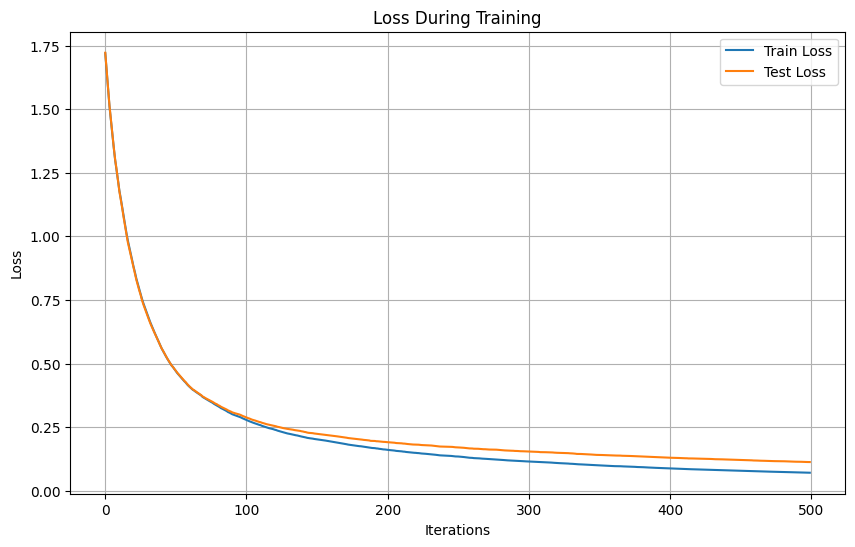

In [24]:
eval_results = model.get_evals_result()

plt.figure(figsize=(10, 6))
plt.plot(eval_results['learn']['MultiClass'], label='Train Loss')
plt.plot(eval_results['validation']['MultiClass'], label='Test Loss')
plt.title('Loss During Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Confusion Matrix

In [21]:
cm = confusion_matrix(y_test, y_pred)

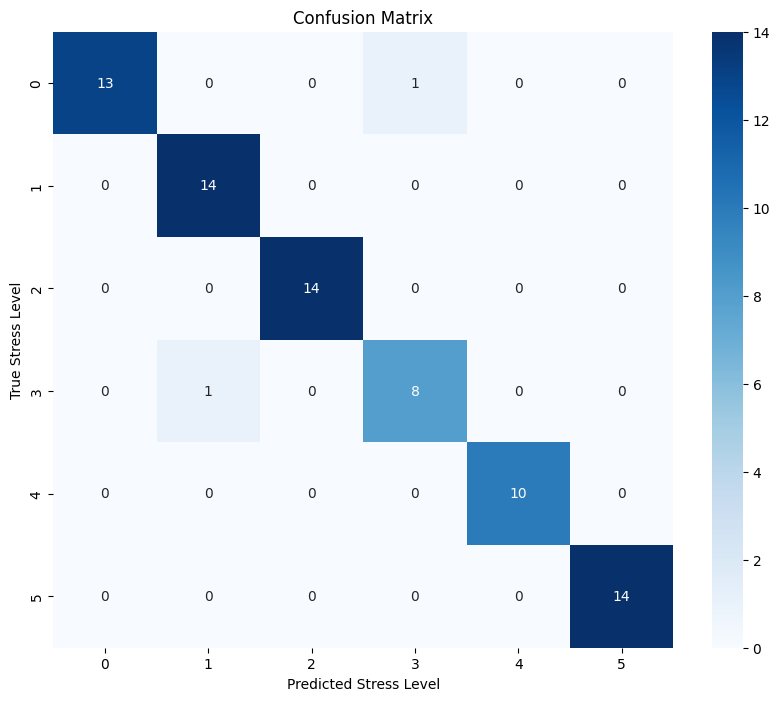

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Stress Level")
plt.ylabel("True Stress Level")
plt.show()

### Accuracy

In [15]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {100*accuracy:.2f}%")

Accuracy: 97.33%
